In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
# binary classification on full variance data, and walmart just vector models
# augmenting on best walmart

In [401]:
models = ['SVM', 'Random Forest', '1-NN DTW', 'TSF', 'LSTM']

In [2]:
# Random oversampling. Testing including supporting datasets. 25 runs.
# 0: results, 1:global parameters, 2:model parameters
with open('results/WM_results_DiffDatasets25.pkl', 'rb') as f:
    wm_experiments = pickle.load(f)

In [3]:
wm_results = wm_experiments[0]
wm_global_params = wm_experiments[1]
for i in range(4):
    print(i, wm_global_params[i])

0 ['Variance', True, False, 0.01]
1 ['Variance', 'POS', True, False, 0.01]
2 ['Variance', 'Inventory', True, False, 0.01]
3 ['Variance', 'POS', 'Inventory', True, False, 0.01]


In [374]:
wm_cols = ['SVM', 'RandomForest', 'KNeighborsTS', 'TSF', 'LSTM_single', 'LSTM']

In [387]:
wm_results[0]['LSTM'] = wm_results[0]['LSTM_single']

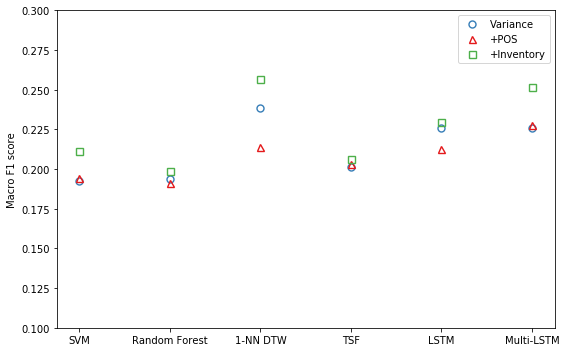

In [409]:
markers = ['o', '^', 's', 'd']
colors = ['#377eb8', '#e41a1c', '#4daf4a', 'k']
plt.figure(figsize=(8,5))
for i in [0,1,2]:
    means = wm_results[i].applymap(np.mean).loc['f1_macro'][wm_cols]
    plt.errorbar(range(6), means, fmt=markers[i], markersize=7, markeredgewidth=1.4, color=colors[i],fillstyle='none')

plt.ylim(0.1, 0.3)
plt.ylabel('Macro F1 score')
plt.legend(['Variance', '+POS', '+Inventory', '+POS, +Inventory'], loc='best')
plt.xticks(ticks=range(6),labels=models + ['Multi-LSTM'], rotation=0)
plt.tight_layout()
# plt.savefig('figures/WM_DiffDatasets_Dots.eps', format='eps')

In [161]:
wm_results[0].rename(index=str, columns={'LSTM':'LSTM_single'}, inplace=True)

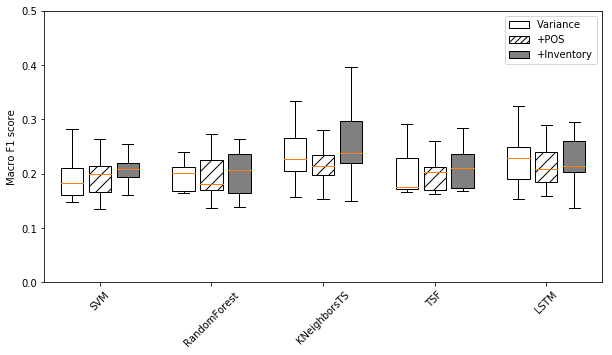

In [331]:
colors = ['w', 'w', 'grey']
plt.figure(figsize=(10,5))

results0 = wm_results[0]
bp0 = plt.boxplot(wm_results[0].loc['f1_macro'][wm_cols], positions=np.array(range(5))*10.0-2.5, sym='', widths=2, patch_artist=True)
bp1 = plt.boxplot(wm_results[1].loc['f1_macro'][wm_cols], positions=np.array(range(5))*10.0, sym='', widths=2, patch_artist=True)
bp2 = plt.boxplot(wm_results[2].loc['f1_macro'][wm_cols], positions=np.array(range(5))*10.0+2.5, sym='', widths=2, patch_artist=True)
# bp3 = plt.boxplot(wm_results[3].loc['f1_macro'][cols], positions=np.array(range(6))*10.0+3, sym='', widths=2, patch_artist=True)


plt.setp(bp0['boxes'], facecolor=colors[0])
plt.setp(bp1['boxes'], facecolor=colors[1], hatch='//')
plt.setp(bp2['boxes'], facecolor=colors[2])

plt.ylim(0, 0.5)
plt.xlim(-5, 45)
plt.xticks(range(0,50,10), cols, rotation=45)
plt.ylabel('Macro F1 score')

circ1 = mpatches.Patch(edgecolor='k',facecolor=colors[0],label='Variance')
circ2= mpatches.Patch(edgecolor='k',facecolor=colors[1],hatch='////', label='+POS')
circ3 = mpatches.Patch(edgecolor='k',facecolor=colors[2], label='+Inventory')
plt.legend(handles=[circ1,circ2,circ3])


plt.show()

In [332]:
cols = wm_augmented_results[2].columns[2:]

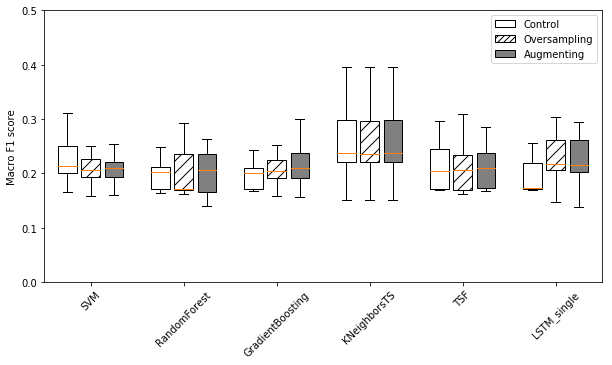

In [333]:
## Too noisy

colors = ['w', 'w', 'grey']
plt.figure(figsize=(10,5))

bp0 = plt.boxplot(wm_augmented_results[2].loc['f1_macro'][cols], positions=np.array(range(6))*10.0-2.5, sym='', widths=2, patch_artist=True)
bp1 = plt.boxplot(wm_augmented_results[1].loc['f1_macro'][cols], positions=np.array(range(6))*10.0, sym='', widths=2, patch_artist=True)
bp2 = plt.boxplot(wm_augmented_results[0].loc['f1_macro'][cols], positions=np.array(range(6))*10.0+2.5, sym='', widths=2, patch_artist=True)

      
plt.setp(bp0['boxes'], facecolor=colors[0])
plt.setp(bp1['boxes'], facecolor=colors[1], hatch='//')
plt.setp(bp2['boxes'], facecolor=colors[2])

plt.ylim(0, 0.5)
plt.xlim(-5, 55)
plt.xticks(range(0,60,10), cols, rotation=45)
plt.ylabel('Macro F1 score')

circ1 = mpatches.Patch(edgecolor='k',facecolor=colors[0],label='Control')
circ2= mpatches.Patch(edgecolor='k',facecolor=colors[1],hatch='////', label='Oversampling')
circ3 = mpatches.Patch(edgecolor='k',facecolor=colors[2], label='Augmenting')
plt.legend(handles=[circ1,circ2,circ3])


plt.show()

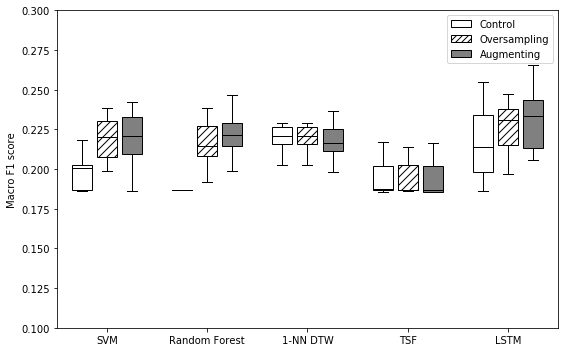

In [407]:
## Variance data augmenting. Models kept constant.
with open('results/AllAugmented_DefaultParams.pkl', 'rb') as f:
    experiments = pickle.load(f)[0]
    
cols = ['SVM', 'RandomForest', 'KNeighborsTS', 'TSF', 'LSTM']
colors = ['w', 'w', 'grey']
plt.figure(figsize=(8,5))

bp0 = plt.boxplot(experiments[0].loc['f1_macro'][cols], positions=np.array(range(5))*10.0-2.5, sym='', widths=2, patch_artist=True)
bp1 = plt.boxplot(experiments[1].loc['f1_macro'][cols], positions=np.array(range(5))*10.0, sym='', widths=2, patch_artist=True)
bp2 = plt.boxplot(experiments[2].loc['f1_macro'][cols], positions=np.array(range(5))*10.0+2.5, sym='', widths=2, patch_artist=True)

for bp in (bp0, bp1, bp2):
    plt.setp(bp['medians'], color='k')
plt.setp(bp0['boxes'], facecolor=colors[0])
plt.setp(bp1['boxes'], facecolor=colors[1], hatch='///')
plt.setp(bp2['boxes'], facecolor=colors[2])

plt.ylim(0.1, 0.3)
plt.xlim(-5, 45)
plt.xticks(range(0,50,10), models, rotation=0)
plt.ylabel('Macro F1 score')

circ1 = mpatches.Patch(edgecolor='k',facecolor=colors[0],label='Control')
circ2= mpatches.Patch(edgecolor='k',facecolor=colors[1],hatch='////', label='Oversampling')
circ3 = mpatches.Patch(edgecolor='k',facecolor=colors[2], label='Augmenting')
plt.legend(handles=[circ1,circ2,circ3])
plt.tight_layout()

plt.savefig('figures/All_augmented_box.eps', format='eps')
plt.show()

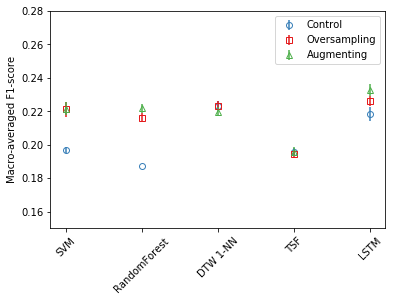

In [303]:
markers = ['o', 's', '^']
colors = ['#377eb8', '#e41a1c', '#4daf4a']

for i in [0,1,2]:
    stds = experiments[i].applymap(lambda x: np.std(x)/np.sqrt(25)).loc['f1_macro'][cols]
    means = experiments[i].applymap(np.mean).loc['f1_macro'][cols]
    plt.errorbar(range(5), means[cols], yerr=stds, fmt=markers[i], color=colors[i], fillstyle='none')

plt.ylim(0.15,0.28)
plt.ylabel('Macro F1 score')
plt.legend(['Control', 'Oversampling', 'Augmenting'])
plt.xticks(ticks=range(5),labels=['SVM','RandomForest','DTW 1-NN', 'TSF', 'LSTM'], rotation=45)
plt.show()